In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
cData = pd.read_csv("C:\\Users\\TECH\Desktop\\Data Science\\Machine Learning\\pima-indians-diabetes.csv")
cData.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
cData.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [4]:
cData.isnull().values.any()

False

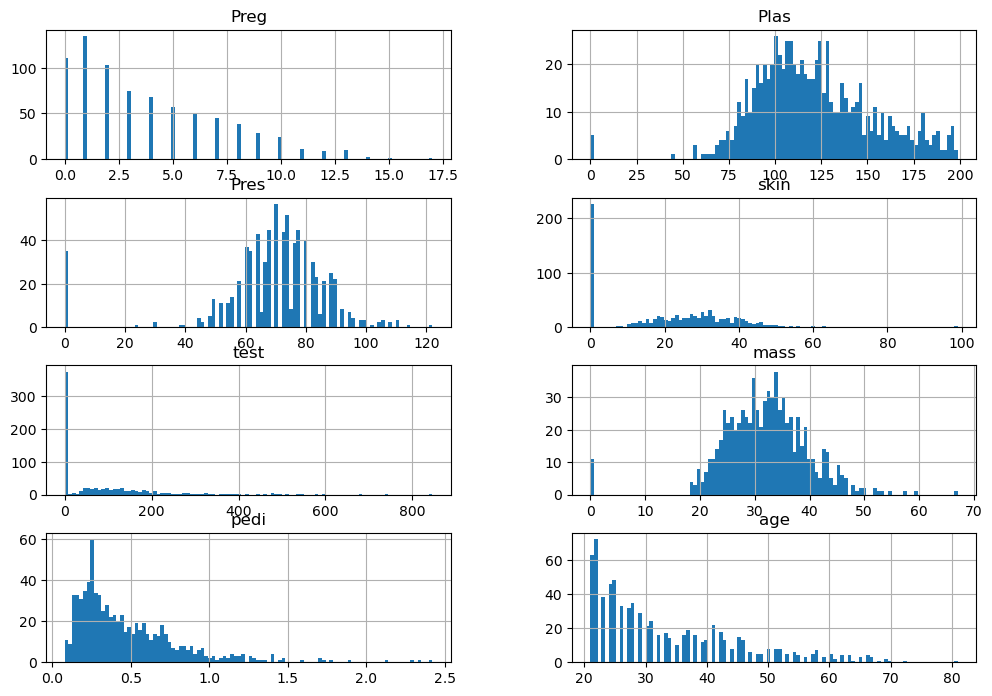

In [5]:
columns = list(cData)[0:-1] # Excluding Outcome column which has only 
cData[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [6]:
cData.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
x = cData.drop('class', axis = 1)
y = cData['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 44)



In [8]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
46,1,146,56,0,0,29.7,0.564,29
308,0,128,68,19,180,30.5,1.391,25
735,4,95,60,32,0,35.4,0.284,28
449,0,120,74,18,63,30.5,0.285,26
429,1,95,82,25,180,35.0,0.233,43


In [9]:
from sklearn.impute import SimpleImputer #replace 0 values with mean

rep_0 = SimpleImputer(missing_values = 0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1.000000,146.0,56.0,29.303109,155.065517,29.7,0.564,29.0
1,4.339827,128.0,68.0,19.000000,180.000000,30.5,1.391,25.0
2,4.000000,95.0,60.0,32.000000,155.065517,35.4,0.284,28.0
3,4.339827,120.0,74.0,18.000000,63.000000,30.5,0.285,26.0
4,1.000000,95.0,82.0,25.000000,180.000000,35.0,0.233,43.0


In [10]:
from sklearn.naive_bayes import GaussianNB

model_ = GaussianNB()# create the model

model_.fit(x_train, y_train.ravel())

GaussianNB()

In [11]:
model_predict = model_.predict(x_train)
model_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [12]:
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, model_predict)))

Model Accuracy: 0.7412


In [19]:
import numpy as np
from sklearn import metrics

test_predict = model_.predict(x_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))


Model Accuracy: 0.7965


<AxesSubplot:>

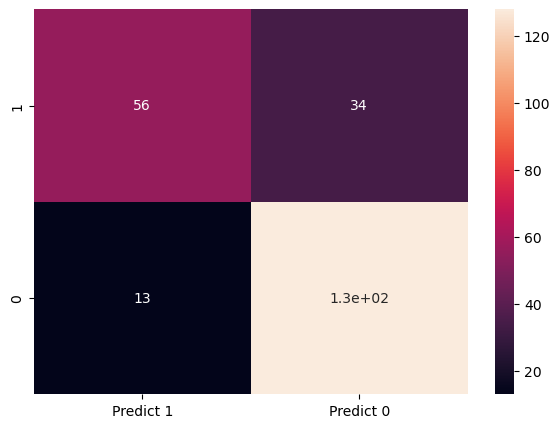

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cm = metrics.confusion_matrix(y_test, test_predict, labels = [1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True)

In [29]:
print("Classification Report")
print(metrics.classification_report(y_test, test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.81      0.62      0.70        90
           0       0.79      0.91      0.84       141

    accuracy                           0.80       231
   macro avg       0.80      0.77      0.77       231
weighted avg       0.80      0.80      0.79       231

